# Value at Risk Analysis for a Semiconductor Portfolio
Value at Risk (VaR) is a fundamental metric in risk management that estimates the potential loss of a portfolio or asset over a specific time period at a given confidence level, assuming normal market conditions. It provides investors with a quantifiable measure of risk exposure.

There are **three** primary methods to calculate VaR:

- ```Historical Method```: This method uses historical returns of a portfolio or asset to estimate potential losses. It ranks past returns and identifies the loss at the desired confidence level (e.g., the 5th percentile for a 95% VaR).

- ```Variance-Covariance Method```: Assuming returns follow a normal distribution, this method uses the portfolio’s mean return and standard deviation, along with the variance-covariance matrix to account for correlations between assets, to calculate VaR.

- ```Monte Carlo Simulation```: This method generates thousands of random scenarios based on statistical models of asset returns to estimate the distribution of potential losses and derive the VaR.

VaR helps investors understand the maximum expected loss within a given timeframe and confidence level. For example, a 1-day VaR of $120,000 at a 95% confidence level for a semiconductor portfolio means there is a 5% chance that the portfolio could lose more than $120,000 in a single day under normal market conditions.

## Historical VaR

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

### Data Retrieval

Using **yfinance**, a popular library for fetching data from yahoo finance to retreive company stock price. Using the adjusted closing price for the calculations. The retrieved companies are as follows:

- Shin-Etsu (OTC:SHECY)
- Taiwan Semiconductor Manufacturing Company (NASDAQ:TSM)
- ON Semicondutor (NASDAQ:ON)
- Intel Corporation (NASDAQ:INTC)
- ASML Holdings NV (NASDAQ:ASML)
- Synopsys (NASDAQ:SNPS)



In [ ]:
tickers = ["SHECY",
           "TSM",
           "ON",
           "INTC",
           "ASML",
           "SNPS"]

aggregated_data = pd.DataFrame()

for ticks in tickers:

    data = yf.Ticker(ticks).history(period="max", auto_adjust=False)["Adj Close"]

    aggregated_data[ticks] = data

print("Years: ", (aggregated_data.index[-1].year - aggregated_data.index[0].year))
display(aggregated_data)

Years:  17


,SHECY,TSM,ON,INTC,ASML,SNPS
Date,,,,,,
2008-11-25 00:00:00-05:00,4.236433,3.977197,2.760000,8.220891,13.774796,15.440000
2008-11-26 00:00:00-05:00,3.991552,4.300157,2.880000,8.746824,14.505628,15.940000
2008-11-28 00:00:00-05:00,3.820136,4.276234,2.920000,8.640388,14.181842,16.030001
2008-12-01 00:00:00-05:00,3.820136,3.929350,2.680000,7.864007,12.720179,14.880000
2008-12-02 00:00:00-05:00,3.820136,3.791793,2.870000,8.314807,13.117974,15.520000
...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,14.980000,242.619995,47.590000,19.770000,713.119995,620.330017
2025-08-08 00:00:00-04:00,15.150000,241.830002,47.660000,19.950001,722.320007,619.419983
2025-08-11 00:00:00-04:00,15.100000,242.089996,47.099998,20.650000,721.309998,616.119995


### Portfolio Value, Weights & Log Returns

Using a continously compounded return called log returns.

$R = $ $\ln({p_t\over{p_{t-1}}})$

Log returns can be reverted back to simple returns.

$e^{R} - 1$

With a portfolio worth **$500,000** and is distributed across the six companies.
- SHECY -> $500,000
- TSM -> $150,000
- ON -> $50_000
- INTC -> $100,000
- ASML -> $100,000
- SNPS -> $50_000

In [ ]:
portfolio_value = 500_000

portfolio_weights = np.array([50_000/portfolio_value,
                     150_000/portfolio_value,
                     50_000/portfolio_value,
                     100_000/portfolio_value,
                     100_000/portfolio_value,
                     50_000/portfolio_value])

log_returns = (np.log(
    aggregated_data / aggregated_data.shift(1)) * portfolio_weights).dropna()

print("Portfolio Weights: ", portfolio_weights)
display(log_returns)

Portfolio Weights:  [0.1 0.3 0.1 0.2 0.2 0.1]


,SHECY,TSM,ON,INTC,ASML,SNPS
Date,,,,,,
2008-11-26 00:00:00-05:00,-0.005954,0.023422,0.004256,0.012402,0.010339,0.003187
2008-11-28 00:00:00-05:00,-0.004389,-0.001674,0.001379,-0.002449,-0.004515,0.000563
2008-12-01 00:00:00-05:00,0.000000,-0.025380,-0.008577,-0.018830,-0.021755,-0.007444
2008-12-02 00:00:00-05:00,0.000000,-0.010690,0.006850,0.011148,0.006159,0.004211
2008-12-03 00:00:00-05:00,-0.003258,0.009318,0.013658,0.005643,0.003495,-0.002810
...,...,...,...,...,...,...
2025-08-07 00:00:00-04:00,0.001006,0.014243,0.001290,-0.006372,0.006314,-0.000891
2025-08-08 00:00:00-04:00,0.001128,-0.000978,0.000147,0.001813,0.002564,-0.000147
2025-08-11 00:00:00-04:00,-0.000331,0.000322,-0.001182,0.006897,-0.000280,-0.000534


### Dollar Log PnL

In [17]:
dollar_log_pnl = log_returns.sum(axis=1) * portfolio_value

display(dollar_log_pnl)

Date
2008-11-26 00:00:00-05:00    23826.356349
2008-11-28 00:00:00-05:00    -5542.088326
2008-12-01 00:00:00-05:00   -40992.753697
2008-12-02 00:00:00-05:00     8838.627609
2008-12-03 00:00:00-05:00    13022.851882
                                 ...     
2025-08-07 00:00:00-04:00     7795.455707
2025-08-08 00:00:00-04:00     2263.311254
2025-08-11 00:00:00-04:00     2446.514565
2025-08-12 00:00:00-04:00    13728.997013
2025-08-13 00:00:00-04:00     3403.912559
Length: 4203, dtype: float64

### One-day Value at Risk

In [18]:
confidence_interval = .95

var = -np.nanpercentile(dollar_log_pnl, 1-confidence_interval)

print(f"One-day {int(confidence_interval*100)}% VaR: ${var:,}")
print(f"One-day VaR as a Percentage: {round((var/portfolio_value)*100, 2)}%", )

One-day 95% VaR: $56,034.34521259189
One-day VaR as a Percentage: 11.21%


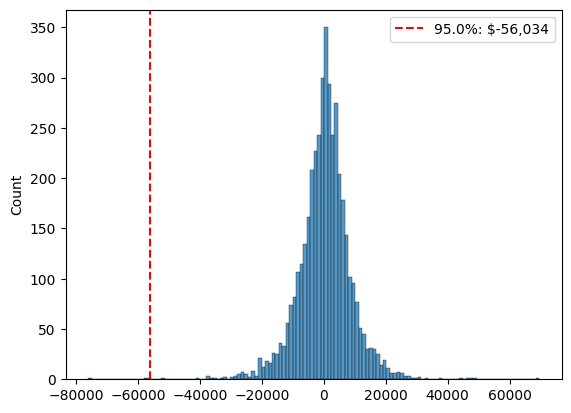

In [19]:
sns.histplot(dollar_log_pnl)
plt.axvline(-var, color="red", linestyle="--", label=f"{confidence_interval*100}%: ${-round(var):,}")
plt.legend()
plt.show()

### T-period Value at Risk

In [20]:
period = 30
confidence_level = .95
period_logreturns = dollar_log_pnl.rolling(window=period).sum()

var = np.nanpercentile(period_logreturns, 1-confidence_level)

print(f"{period}-day {int(confidence_level*100)}% VaR: ${-var:,}")
print(f"{period}-day VaR as a Percentage: {round((var/portfolio_value)*100, 2)}%", )

30-day 95% VaR: $177,691.5034005677
30-day VaR as a Percentage: -35.54%


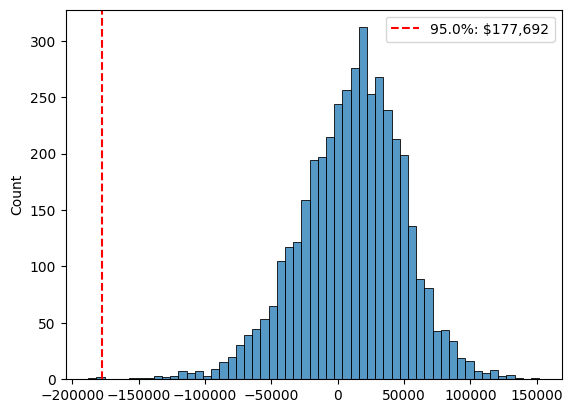

In [21]:
sns.histplot(period_logreturns)
plt.axvline(var, color="red",  linestyle="--", label=f"{confidence_level*100}%: ${round(-var):,}")
plt.legend()
plt.show()

## Variance-Covariance VaR

In [9]:
confidence_level = .95

z = norm.ppf(1 - confidence_level)

In [10]:
covmatrix_logreturns = log_returns.cov()

portfolio_std = np.sqrt(np.dot(portfolio_weights.T, np.dot(covmatrix_logreturns, portfolio_weights)))

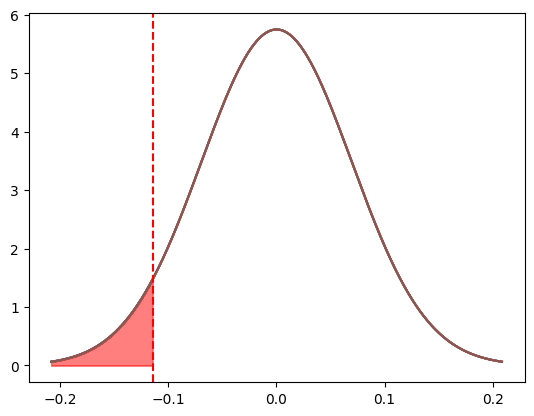

In [12]:
x = np.linspace(covmatrix_logreturns.mean() - 3*portfolio_std, covmatrix_logreturns.mean() + 3*portfolio_std, 1000)
y = norm.pdf(x, covmatrix_logreturns.mean(), portfolio_std)


plt.plot(x, y, label="Normal Distribution")
plt.axvline((portfolio_std * z), color="red", linestyle="--", label=f"VaR (95%): {(portfolio_std * z):.2%}")

x_shade = x[x <= (portfolio_std * z)]
y_shade = y[x <= (portfolio_std * z)]

# Shade the area under the curve
plt.fill_between(x_shade, y_shade, color="red", alpha=0.5, label=f"Area below {(portfolio_std * z)}")
plt.show()